<a href="https://colab.research.google.com/github/TaruSora/NLP_100knock/blob/main/100knock_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

60.Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．

In [ ]:
FILE_ID = "0B7XkCwpI5KDYNlNUTTlSS21pQmM"
FILE_NAME = "GoogleNews-vectors-negative300.bin.gz"
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=$FILE_ID' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=$FILE_ID" -O $FILE_NAME && rm -rf /tmp/cookies.txt
from gensim.models import KeyedVectors

--2022-03-15 01:49:41--  https://docs.google.com/uc?export=download&confirm=t&id=0B7XkCwpI5KDYNlNUTTlSS21pQmM
Resolving docs.google.com (docs.google.com)... 108.177.97.113, 108.177.97.139, 108.177.97.138, ...
Connecting to docs.google.com (docs.google.com)|108.177.97.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-8s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/h313nf6juinn09f6blo8knkams7ildbm/1647308925000/06848720943842814915/*/0B7XkCwpI5KDYNlNUTTlSS21pQmM?e=download [following]
--2022-03-15 01:49:41--  https://doc-0g-8s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/h313nf6juinn09f6blo8knkams7ildbm/1647308925000/06848720943842814915/*/0B7XkCwpI5KDYNlNUTTlSS21pQmM?e=download
Resolving doc-0g-8s-docs.googleusercontent.com (doc-0g-8s-docs.googleusercontent.com)... 64.233.189.132, 2404:6800:4008:c07::84
Connecting to doc-0g-8s-docs.googleusercontent.com (doc-0g-8s-docs.googleuse

In [ ]:
# 60 単語ベクトルの読み込みと表示

from gensim.models import KeyedVectors

# 読み込み
model = KeyedVectors.load_word2vec_format('./drive/MyDrive/100本ノック/第7章/GoogleNews-vectors-negative300.bin.gz', binary=True)
# 表示
model['United_States']

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

61.“United States”と”U.S.”のコサイン類似度を計算せよ.

In [ ]:
# 61 単語の類似度

model.similarity('United_States', 'U.S.')

0.73107743

62.“United States”とコサイン類似度が高い10語と，その類似度を出力せよ．

In [ ]:
# 62 類似度の高い単語10件

model.most_similar('United_States', topn=10)

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370391845703),
 ('United_Sates', 0.74007248878479),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.6019070148468018)]

63.“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．

In [ ]:
# 63 加法構成性によるアナロジー

model.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'], topn=10)

[('Greece', 0.6898481249809265),
 ('Aristeidis_Grigoriadis', 0.5606848001480103),
 ('Ioannis_Drymonakos', 0.5552908778190613),
 ('Greeks', 0.545068621635437),
 ('Ioannis_Christou', 0.5400862693786621),
 ('Hrysopiyi_Devetzi', 0.5248444676399231),
 ('Heraklio', 0.5207759737968445),
 ('Athens_Greece', 0.516880989074707),
 ('Lithuania', 0.5166866183280945),
 ('Iraklion', 0.5146791934967041)]

64.単語アナロジーの評価データをダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．

In [ ]:
# 64 アナロジーデータでの実験

with open('./drive/MyDrive/100本ノック/第7章/questions-words.txt', 'r') as f1, open('./drive/MyDrive/100本ノック/第7章/questions-words-add.txt', 'w') as f2:
    for line in f1:
        line = line.split()
        if line[0] == ':': # カテゴリ情報を含む行
            category = line[1]
        else:
            word, cos = model.most_similar(positive=[line[1], line[2]], negative=[line[0]], topn=1)[0]
            f2.write(' '.join([category] + line + [word, str(cos) + '\n'])) # 末尾に類似度の高い単語、類似度を追記

65.64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．

In [ ]:
# 65 アナロジータスクでの正解率

with open('./drive/MyDrive/100本ノック/第7章/questions-words-add.txt', 'r') as f:
    semantic_count, semantic_correct = 0, 0 # 意味的アナロジーの個数/一致した個数
    syntactic_count, syntactic_correct = 0, 0 # 文法的アナロジーの個数/一致した個数
    for line in f:
        line = line.split()
        if not line[0].startswith('gram'): # gram以外で始まるカテゴリは意味的アナロジーを評価
            semantic_count += 1
            if line[4] == line[5]:
                semantic_correct += 1
        else: # gramで始まるカテゴリは文法的アナロジーを評価
            syntactic_count += 1
            if line[4] == line[5]:
                syntactic_correct += 1

semantic_accuracy = semantic_correct/semantic_count
syntactic_accuracy = syntactic_correct/syntactic_count

print('意味的アナロジーの正解率：', semantic_accuracy)
print('文法的アナロジーの正解率：', syntactic_accuracy)

意味的アナロジーの正解率： 0.7308602999210734
文法的アナロジーの正解率： 0.7400468384074942


66.The WordSimilarity-353 Test Collectionの評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．

In [ ]:
!wget http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip
!unzip wordsim353.zip

--2022-03-15 02:06:19--  http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip
Resolving www.gabrilovich.com (www.gabrilovich.com)... 208.97.177.37
Connecting to www.gabrilovich.com (www.gabrilovich.com)|208.97.177.37|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip [following]
--2022-03-15 02:06:20--  https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip
Resolving gabrilovich.com (gabrilovich.com)... 208.97.177.37
Connecting to gabrilovich.com (gabrilovich.com)|208.97.177.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23257 (23K) [application/zip]
Saving to: ‘wordsim353.zip’

wordsim353.zip      100%[===================>]  22.71K   134KB/s    in 0.2s    

2022-03-15 02:06:21 (134 KB/s) - ‘wordsim353.zip’ saved [23257/23257]

Archive:  wordsim353.zip
  inflating: combined.csv            
  inflating: set1.csv                
  

In [ ]:
# 66 WordSimilarity-353での評価

import numpy as np
from scipy.stats import spearmanr

result = []
with open('combined.csv', 'r') as f:
    w2v = [] # 計算された類似度判定
    human = [] # 人間の類似度判定
    lines = f.readlines()
    for line in lines[1:]:
        line = line.split(',')
        w2v.append(model.similarity(line[0], line[1]))
        human.append(line[2].strip())

# スピアマン相関係数
correlation, pvalue = spearmanr(human, w2v)
print('スピアマン相関係数：', correlation)

スピアマン相関係数： 0.6849564489532377


67.国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．

In [ ]:
 # 67 k-meansクラスタリング


 from sklearn.cluster import KMeans

 countries = set()
 with open('./drive/MyDrive/100本ノック/第7章/questions-words-add.txt', 'r') as f:
     for line in f:
         line = line.split()
         if line[0] in ['capital-common-countries', 'capital-world']:
             countries.add(line[2])
         elif line[0] in ['currency', 'gram6-nationality-adjective']:
             countries.add(line[1])

# リスト化
countries_list = list(countries)
# 単語ベクトルの取得
countries_vec = [model[country] for country in countries_list]

# k-meansクラスタリング
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(countries_vec)
for i in range(5):
    cluster = np.where(kmeans.labels_ == i)[0]
    print('cluster', i)
    print(', '.join([countries_list[k] for k in cluster]))

cluster 0
Dominica, Suriname, Samoa, Argentina, Mexico, Chile, Uruguay, Cuba, Venezuela, Ecuador, Honduras, Bahamas, Nicaragua, Brazil, Colombia, Jamaica, Peru, Belize, Guyana
cluster 1
Ireland, Italy, Finland, Malta, Canada, Denmark, Sweden, Europe, Belgium, Switzerland, Jordan, Portugal, Iceland, USA, Norway, Germany, Austria, Greenland, Spain, Liechtenstein, Greece, Australia, Netherlands, France, England
cluster 2
Laos, Korea, Bhutan, Lebanon, Thailand, Taiwan, Afghanistan, Oman, Cambodia, Qatar, Japan, Malaysia, China, Vietnam, Pakistan, India, Bahrain, Nepal, Tuvalu, Iraq, Indonesia, Fiji, Bangladesh, Philippines
cluster 3
Russia, Belarus, Armenia, Kyrgyzstan, Romania, Poland, Croatia, Kazakhstan, Israel, Latvia, Serbia, Slovenia, Uzbekistan, Cyprus, Lithuania, Syria, Ukraine, Montenegro, Moldova, Turkey, Bulgaria, Turkmenistan, Hungary, Macedonia, Slovakia, Azerbaijan, Georgia, Albania, Estonia, Iran, Tajikistan
cluster 4
Madagascar, Mozambique, Niger, Botswana, Gambia, Egypt, G

68.国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

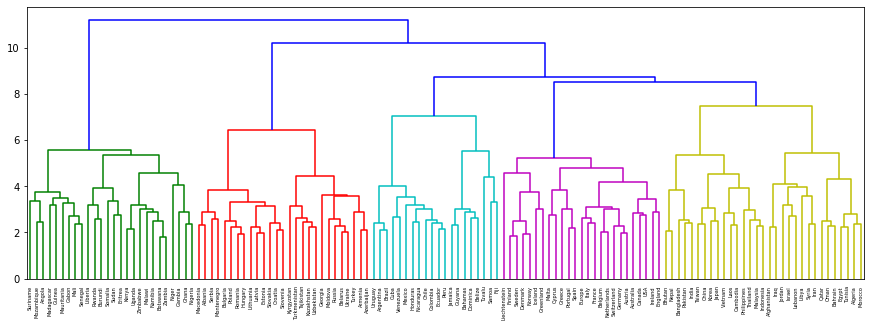

In [ ]:
# 68 Ward法によるクラスタリング

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# 階層型クラスタリング
plt.figure(figsize=(15, 5))
Z = linkage(countries_vec, method='ward')
# デンドログラム
dendrogram(Z, labels=countries_list)
plt.show()

69.ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ．

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


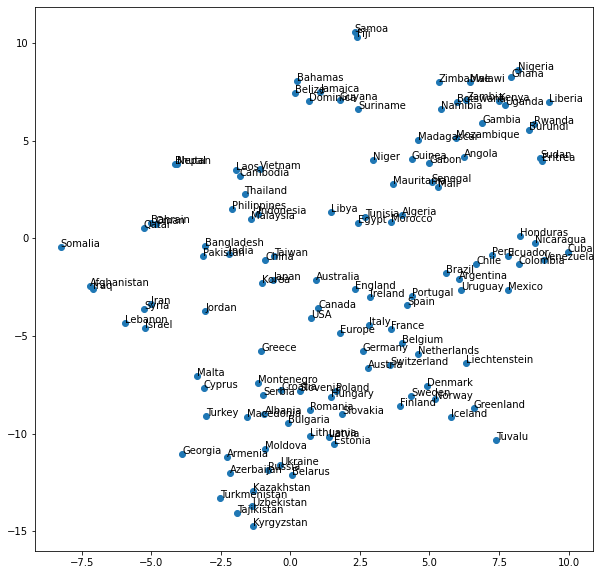

In [ ]:
# 69 t-SNEによる可視化Permalink

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(np.array(countries_vec))

plt.figure(figsize=(10, 10))
plt.scatter(np.array(X_reduced).T[0], np.array(X_reduced).T[1])
for (x, y), name in zip(X_reduced, countries_list):
    plt.annotate(name, (x, y))
plt.show()